In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
pd.to_numeric(df.TotalCoinSupply, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1247    False
1248    False
1249    False
1250    False
1251    False
Name: TotalCoinSupply, Length: 1252, dtype: bool

# Data Preparation

In [6]:
df_sub = df.copy()

df_sub = df_sub.loc[df_sub.IsTrading == True].reset_index(drop=True)

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [7]:
df_sub = df_sub.dropna(how="any").reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 32.9+ KB


In [8]:
df_sub.sort_values(by="TotalCoinsMined")

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
667,FIII,Fiii,SHA3-256,True,DPoC,-5.917978e+09,5000000000
408,LBTC,LiteBitcoin,Scrypt,True,PoW,0.000000e+00,1000000000
101,RIPO,RipOffCoin,Scrypt,True,PoW,0.000000e+00,12000000
291,BASH,LuckChain,Scrypt,True,PoW/PoS,0.000000e+00,1000000000
287,CSH,CashOut,SHA-256,True,PoW,0.000000e+00,100000000
...,...,...,...,...,...,...,...
571,QWC,Qwertycoin,CryptoNight Heavy,True,PoW,9.955311e+10,184470000000
407,NYC,NewYorkCoin,Scrypt,True,PoW,1.430067e+11,0
395,GCN,gCn Coin,Scrypt,True,PoW,1.630551e+11,200000000000
136,BCN,ByteCoin,CryptoNight,True,PoW,1.840668e+11,184467440735


In [9]:
mask = df_sub.TotalCoinsMined > 0
df_sub = df_sub.loc[mask].reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 25.6+ KB


In [10]:
df_sub["TotalCoinSupply"] = pd.to_numeric(df_sub.TotalCoinSupply)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    float64
dtypes: bool(1), float64(2), object(4)
memory usage: 25.6+ KB


In [11]:
[x for x in df_sub.ProofType.value_counts().index]

['PoW',
 'PoW/PoS',
 'PoS',
 'DPoS',
 'PoC',
 'PoS/PoW',
 'PoW/PoS ',
 'Pos',
 'PoS/LPoS',
 'TPoS',
 'PoA',
 'DPOS',
 'PoW and PoS',
 'PoST',
 'Proof of Authority',
 'Zero-Knowledge Proof',
 'PoW/nPoS',
 'Proof of Trust',
 'dPoW/PoW',
 'PoW/PoW',
 'PoS/PoW/PoT',
 'POBh',
 'HPoW',
 'PoW + Hive',
 'LPoS']

In [12]:
df_sub.loc[df_sub.ProofType == "PoW/PoS ", "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == "Pos", "ProofType"] = "PoS"
df_sub.loc[df_sub.ProofType == "Proof of Authority", "ProofType"] = "PoA"
df_sub.loc[df_sub.ProofType == "PoW and PoS", "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == "Proof of Trust", "ProofType"] = "PoT"

In [13]:
[x for x in df_sub.ProofType.value_counts().index]

['PoW',
 'PoW/PoS',
 'PoS',
 'DPoS',
 'PoC',
 'PoS/PoW',
 'PoA',
 'PoS/LPoS',
 'TPoS',
 'PoT',
 'DPOS',
 'PoST',
 'PoW/nPoS',
 'Zero-Knowledge Proof',
 'PoW + Hive',
 'dPoW/PoW',
 'PoW/PoW',
 'PoS/PoW/PoT',
 'POBh',
 'HPoW',
 'LPoS']

In [14]:
coin_sub = df_sub.CoinName

df_sub.drop(["Unnamed: 0", "CoinName", "IsTrading"], axis=1, inplace=True)
df_sub.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [15]:
df_sub2 = pd.get_dummies(df_sub)
df_sub2.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler = scaler.fit(df_sub2.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]])
# scaler = scaler.fit(df_sub)

In [18]:
df_sub3 = df_sub2.copy()

df_sub3.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]] = scaler.transform(df_sub2.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]])
df_sub3.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_sub3)
tsne_features.shape

(532, 2)

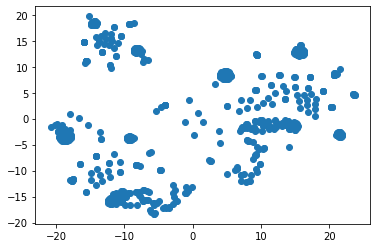

In [21]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()
pca.fit(df_sub3)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[4.86144130e-01 1.12847212e-01 8.45960792e-02 7.32508093e-02
 5.77306595e-02 3.17660063e-02 1.97031162e-02 9.52271975e-03
 8.92066253e-03 8.21403709e-03 7.70118235e-03 6.28819177e-03
 5.84877136e-03 5.28749132e-03 4.91337373e-03 4.80729200e-03
 3.99735722e-03 3.58612184e-03 3.08181848e-03 2.57597086e-03
 2.14115526e-03 2.14115526e-03 2.14114718e-03 2.14049574e-03
 2.12771942e-03 2.04914070e-03 1.84226967e-03 1.74607547e-03
 1.70605685e-03 1.60585516e-03 1.60125900e-03 1.52901629e-03
 1.47672963e-03 1.36767814e-03 1.26603922e-03 1.07747272e-03
 1.07057763e-03 1.07057763e-03 1.07057763e-03 1.07057763e-03
 1.07057763e-03 1.06898100e-03 1.06334477e-03 1.05790525e-03
 1.02509486e-03 9.85277904e-04 7.99635191e-04 7.04929971e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.352888

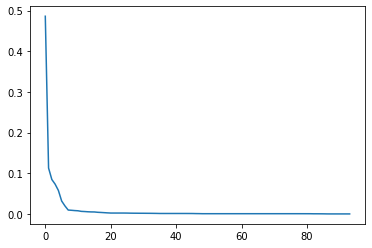

In [24]:
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

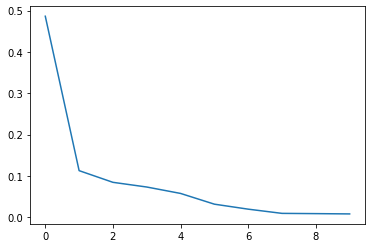

In [25]:
plt.plot(range(10), pca.explained_variance_ratio_[0:10])
plt.show()

In [26]:
np.sum(pca.explained_variance_ratio_[0:11])

0.900396614178474

In [27]:
pca = PCA(n_components=0.90)
pca.fit(df_sub3)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.48614413 0.11284721 0.08459608 0.07325081 0.05773066 0.03176601
 0.01970312 0.00952272 0.00892066 0.00821404 0.00770118]
0.900396614178474


In [28]:
print(len(pca.explained_variance_ratio_))

11


In [29]:
df_pca = pca.transform(df_sub3)
df_pca = pd.DataFrame(df_pca, columns = ["PCA"+ str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-0.209691,-0.808170,0.168907,-0.663340,-0.004221,-0.025304,0.002418,-0.012781,-0.046990,-0.021372,-0.007774
1,-0.187805,-0.810617,0.158472,-0.664012,-0.004872,-0.025161,0.002526,-0.013793,-0.047109,-0.021429,-0.007660
2,3.529267,-0.317246,2.910638,0.416936,-0.203725,-0.261915,-0.282133,-0.137953,0.753249,0.347229,-0.241091
3,-0.179927,0.699969,-0.165025,0.220439,-0.285466,-0.616501,0.622780,-0.016936,0.028175,0.008040,-0.026113
4,-0.173063,0.693041,-0.152954,0.115317,-0.215415,-0.104622,-0.242670,0.010629,0.111604,-0.125831,0.059776


In [30]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

(532, 2)

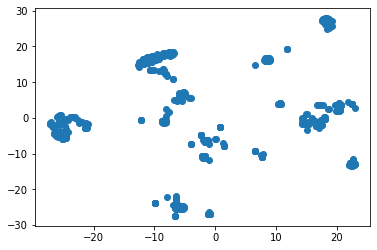

In [31]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# running kmeans with PCA

In [32]:
from sklearn.cluster import KMeans

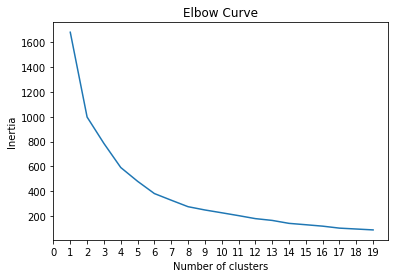

In [33]:
# Finding the best value for k
inertia = []
k = list(range(1, 20))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
# Predicting clusters with k=6

# Initialize the k-means model
model = KMeans(n_clusters=6, random_state=0)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Add the predicted class column to the dataframe
df_pca["class"] = model.labels_
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,class
0,-0.209691,-0.808170,0.168907,-0.663340,-0.004221,-0.025304,0.002418,-0.012781,-0.046990,-0.021372,-0.007774,0
1,-0.187805,-0.810617,0.158472,-0.664012,-0.004872,-0.025161,0.002526,-0.013793,-0.047109,-0.021429,-0.007660,0
2,3.529267,-0.317246,2.910638,0.416936,-0.203725,-0.261915,-0.282133,-0.137953,0.753249,0.347229,-0.241091,2
3,-0.179927,0.699969,-0.165025,0.220439,-0.285466,-0.616501,0.622780,-0.016936,0.028175,0.008040,-0.026113,5
4,-0.173063,0.693041,-0.152954,0.115317,-0.215415,-0.104622,-0.242670,0.010629,0.111604,-0.125831,0.059776,5


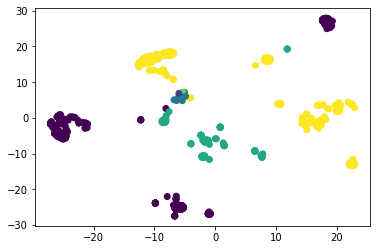

In [35]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=df_pca["class"])
plt.show()

In [36]:
df_pca["class"].value_counts()

5    229
0    182
3    109
2     10
1      1
4      1
Name: class, dtype: int64

In [37]:
df_sub.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [38]:
classes = df_pca["class"]
df_pca["coin"] = coin_sub

In [39]:
preds = df_sub.copy()
preds["coin"] = coin_sub
preds["class"] = classes

preds.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,42 Coin,0
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,404Coin,0
2,X13,PoW/PoS,2.927942e+10,3.141593e+11,EliteCoin,2
3,SHA-256,PoW,1.792718e+07,2.100000e+07,Bitcoin,5
4,Ethash,PoW,1.076842e+08,0.000000e+00,Ethereum,5


In [40]:
preds.groupby("class").mean()

,TotalCoinsMined,TotalCoinSupply
class,,
0,2.492499e+09,3.204951e+09
1,9.899887e+11,9.900000e+11
2,8.841782e+10,1.720409e+11
3,1.649582e+09,3.587962e+09
4,5.313984e+10,1.000000e+12
5,1.224351e+09,3.575834e+09


In [41]:
preds.groupby("class").count()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin
class,,,,,
0,182,182,182,182,182
1,1,1,1,1,1
2,10,10,10,10,10
3,109,109,109,109,109
4,1,1,1,1,1
5,229,229,229,229,229


In [42]:
preds.loc[preds["class"] == 1]

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
525,TRC10,DPoS,9.899887e+11,9.900000e+11,BitTorrent,1


In [43]:
preds.loc[preds["class"] == 4]

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
370,CryptoNight,PoW,5.313984e+10,1.000000e+12,TurtleCoin,4


In [44]:
preds.sort_values(by="TotalCoinsMined", ascending=False)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
525,TRC10,DPoS,9.899887e+11,9.900000e+11,BitTorrent,1
98,CryptoNight,PoW,1.840668e+11,1.844674e+11,ByteCoin,2
294,Scrypt,PoW,1.630551e+11,2.000000e+11,gCn Coin,2
305,Scrypt,PoW,1.430067e+11,0.000000e+00,NewYorkCoin,2
443,CryptoNight Heavy,PoW,9.955311e+10,1.844700e+11,Qwertycoin,2
...,...,...,...,...,...,...
415,CryptoNight,PoW,8.430000e+04,6.000005e+08,PlatinCoin,5
29,Scrypt,PoW/PoS,4.257948e+04,5.000000e+05,BitBar,0
77,X11,PoW/PoS,1.177000e+03,1.000000e+03,SyncCoin,0
21,Scrypt,PoW,8.800000e+01,3.840000e+11,MoonCoin,2


In [45]:
preds.loc[preds["class"] == 5].head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
3,SHA-256,PoW,1.792718e+07,2.100000e+07,Bitcoin,5
4,Ethash,PoW,1.076842e+08,0.000000e+00,Ethereum,5
5,Scrypt,PoW,6.303924e+07,8.400000e+07,Litecoin,5
7,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00,Monero,5
8,Ethash,PoW,1.133597e+08,2.100000e+08,Ethereum Classic,5
9,Equihash,PoW,7.383056e+06,2.100000e+07,ZCash,5
11,Multiple,PoW,1.140622e+10,2.100000e+10,DigiByte,5
14,Scrypt,PoW,5.768310e+06,2.100000e+07,ProsperCoin,5
16,X11,PoW,1.114973e+07,2.000000e+07,Spreadcoin,5
17,Scrypt,PoW,1.220580e+07,6.400000e+07,Argentum,5


In [46]:
preds.loc[preds.coin == "Nano"]

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
278,Blake2b,PoW,133248297.0,340282367.0,Nano,5


In [51]:
import plotly.express as px

In [55]:
fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3',
              color='class', hover_data=["coin"])
fig.show()